# CelebA

In [17]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import random

import torch
import torch.nn as nn

# created library
import mydata
from mymodels import TransDataset, LoadDataset, EfficientB3Model, ResNet50Model, VGG16Model
from training import ModelTrainer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
# to reproduce

seed = 42
random.seed(seed) #　ほかのモジュールで使われているかも
np.random.seed(seed) # ほかのモジュールで使われているかも
torch.manual_seed(seed) # Pytorchの中のシード
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True # GPUの計算過程の変化をさせない

# Efficientnet

In [19]:
db = "CelebA"
model_name = "efficientnet"
root = f"../../dataset/AAAI 2025/{db}/"
model_save_directory = f"{root}/model/{model_name}/"
df_valid_filepath = f"../../dataset/AAAI 2025/{db}/evaluation/df_valid_{model_name}.csv"
df_test_filepath = f"../../dataset/AAAI 2025/{db}/evaluation/df_test_{model_name}.csv"

df_train = mydata.load_and_process_csv(f"{root}/dataframe/df_train.csv")
df_valid = mydata.load_and_process_csv(f"{root}/dataframe/df_valid.csv")
df_test = mydata.load_and_process_csv(f"{root}/dataframe/df_test.csv")

In [20]:
ycol="labels"
batch_size = 8
ld = LoadDataset(df_train, df_valid, df_test, ycol, batch_size)
train_loader, valid_loader, test_loader = ld.create_dataloaders()

H*W:  (218, 178)


Validation Accuracy: 0.6917 | Loss: 0.9452 | F1: 0.6633
Validation Accuracy: 0.7816 | Loss: 0.7234 | F1: 0.7603
Validation Accuracy: 0.8369 | Loss: 0.5791 | F1: 0.8244
Validation Accuracy: 0.8599 | Loss: 1.0745 | F1: 0.8597
Validation Accuracy: 0.8660 | Loss: 0.6778 | F1: 0.8606
Validation Accuracy: 0.8768 | Loss: 0.7971 | F1: 0.8731
Validation Accuracy: 0.8810 | Loss: 0.3768 | F1: 0.8769
Validation Accuracy: 0.8768 | Loss: 0.4583 | F1: 0.8696
Validation Accuracy: 0.8758 | Loss: 0.2902 | F1: 0.8680
Validation Accuracy: 0.8843 | Loss: 0.5448 | F1: 0.8773
Validation Accuracy: 0.8721 | Loss: 0.4373 | F1: 0.8595
Validation Accuracy: 0.9030 | Loss: 0.2339 | F1: 0.9020
Validation Accuracy: 0.9039 | Loss: 0.2751 | F1: 0.9021
Validation Accuracy: 0.9096 | Loss: 0.3381 | F1: 0.9098
Validation Accuracy: 0.9053 | Loss: 0.3052 | F1: 0.9036
Validation Accuracy: 0.9067 | Loss: 0.2236 | F1: 0.9061
Validation Accuracy: 0.9152 | Loss: 0.2191 | F1: 0.9164
Validation Accuracy: 0.9091 | Loss: 0.2248 | F1:

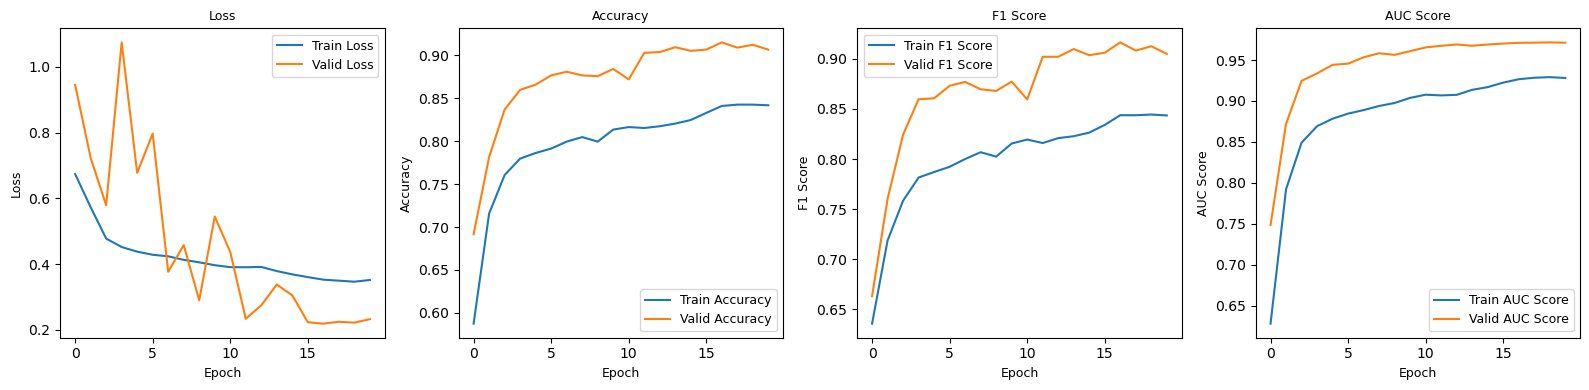

In [21]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = EfficientB3Model().to(device) # model -> GPU

# Train the model
num_epochs = 20
lr = 0.00001

trainer = ModelTrainer(model_save_directory)
best_val_file = trainer.train(model, train_loader, valid_loader, num_epochs=num_epochs, lr=lr)

In [22]:
model = EfficientB3Model().to(device) # model -> GPU
model.load_state_dict(torch.load(best_val_file))

test_predictions = trainer.evaluate(model, valid_loader)
df_valid["predictions"] = test_predictions
trainer.report(df_valid)
df_valid.to_csv(df_valid_filepath, index=False)

              precision    recall  f1-score   support

           0       0.91      0.92      0.91      1049
           1       0.92      0.91      0.92      1085

    accuracy                           0.92      2134
   macro avg       0.92      0.92      0.92      2134
weighted avg       0.92      0.92      0.92      2134

Skin tone 1: Accuracy 0.9231490159325211
Skin tone 2: Accuracy 0.9072164948453608


In [23]:
test_predictions = trainer.evaluate(model, test_loader)
df_test["predictions"] = test_predictions
trainer.report(df_test)
df_test.to_csv(df_test_filepath, index=False)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1047
           1       0.91      0.91      0.91      1082

    accuracy                           0.91      2129
   macro avg       0.91      0.91      0.91      2129
weighted avg       0.91      0.91      0.91      2129

Skin tone 2: Accuracy 0.9081632653061225
Skin tone 1: Accuracy 0.9124643196955281


# Resnet

In [24]:
model_name = "resnet"
root = f"../../dataset/AAAI 2025/{db}/"
model_save_directory = f"{root}/model/{model_name}/"
df_valid_filepath = f"../../dataset/AAAI 2025/{db}/evaluation/df_valid_{model_name}.csv"
df_test_filepath = f"../../dataset/AAAI 2025/{db}/evaluation/df_test_{model_name}.csv"

df_train = mydata.load_and_process_csv(f"{root}/dataframe/df_train.csv")
df_valid = mydata.load_and_process_csv(f"{root}/dataframe/df_valid.csv")
df_test = mydata.load_and_process_csv(f"{root}/dataframe/df_test.csv")

In [25]:
ycol="labels"
batch_size = 8
ld = LoadDataset(df_train, df_valid, df_test, ycol, batch_size)
train_loader, valid_loader, test_loader = ld.create_dataloaders()

H*W:  (218, 178)


/home/kuniko/anaconda3/lib/python3.11/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
/home/kuniko/anaconda3/lib/python3.11/site-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Validation Accuracy: 0.8407 | Loss: 0.4098 | F1: 0.8312
Validation Accuracy: 0.8505 | Loss: 0.3310 | F1: 0.8331
Validation Accuracy: 0.8121 | Loss: 0.4127 | F1: 0.7761
Validation Accuracy: 0.8847 | Loss: 0.2713 | F1: 0.8759
Validation Accuracy: 0.9119 | Loss: 0.2198 | F1: 0.9115
Validation Accuracy: 0.8622 | Loss: 0.3504 | F1: 0.8444
Validation Accuracy: 0.8805 | Loss: 0.2859 | F1: 0.8693
Validation Accuracy: 0.9105 | Loss: 0.2228 | F1: 0.9077
Validation Accuracy: 0.9203 | Loss: 0.2260 | F1: 0.9220
Validation Accuracy: 0.9199 | Loss: 0.2127 | F1: 0.9185
Validation Accuracy: 0.9194 | Loss: 0.2135 | F1: 0.9197
Validation Accuracy: 0.9147 | Loss: 0.2181 | F1: 0.9129
Validation Accuracy: 0.9138 | Loss: 0.2585 | F1: 0.9110
Validation Accuracy: 0.9044 | Loss: 0.2547 | F1: 0.8985
Validation Accuracy: 0.8810 | Loss: 0.3324 | F1: 0.8697
Validation Accuracy: 0.9100 | Loss: 0.2392 | F1: 0.9063
Validation Accuracy: 0.9147 | Loss: 0.2104 | F1: 0.9139
Validation Accuracy: 0.9180 | Loss: 0.2392 | F1:

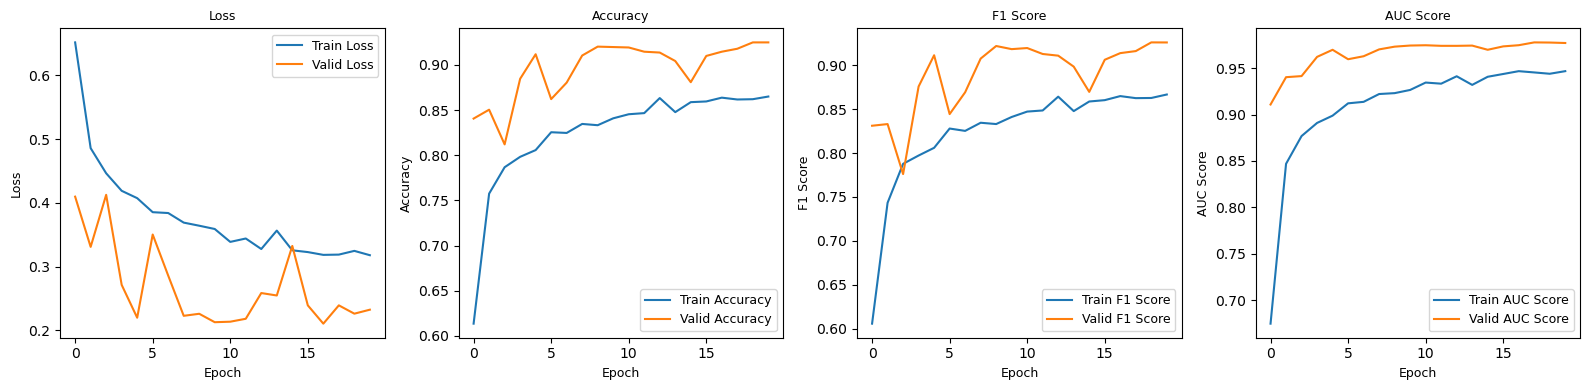

In [26]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ResNet50Model().to(device) # model -> GPU

# Train the model
num_epochs = 20
lr = 0.00001

trainer = ModelTrainer(model_save_directory)
best_val_file = trainer.train(model, train_loader, valid_loader, num_epochs=num_epochs, lr=lr)

In [28]:
model = ResNet50Model().to(device) # model -> GPU
model.load_state_dict(torch.load(best_val_file))

test_predictions = trainer.evaluate(model, valid_loader)
df_valid["predictions"] = test_predictions
trainer.report(df_valid)
df_valid.to_csv(df_valid_filepath, index=False)

              precision    recall  f1-score   support

           0       0.89      0.94      0.92      1049
           1       0.94      0.89      0.91      1085

    accuracy                           0.91      2134
   macro avg       0.92      0.92      0.91      2134
weighted avg       0.92      0.91      0.91      2134

Skin tone 1: Accuracy 0.9203373945641987
Skin tone 2: Accuracy 0.9090909090909091


In [29]:
test_predictions = trainer.evaluate(model, test_loader)
df_test["predictions"] = test_predictions
trainer.report(df_test)
df_test.to_csv(df_test_filepath, index=False)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1047
           1       0.93      0.89      0.91      1082

    accuracy                           0.91      2129
   macro avg       0.91      0.91      0.91      2129
weighted avg       0.91      0.91      0.91      2129

Skin tone 2: Accuracy 0.9146567717996289
Skin tone 1: Accuracy 0.9077069457659372


# VGG

In [30]:
model_name = "vgg"
root = f"../../dataset/AAAI 2025/{db}/"
model_save_directory = f"{root}/model/{model_name}/"
df_valid_filepath = f"../../dataset/AAAI 2025/{db}/evaluation/df_valid_{model_name}.csv"
df_test_filepath = f"../../dataset/AAAI 2025/{db}/evaluation/df_test_{model_name}.csv"

df_train = mydata.load_and_process_csv(f"{root}/dataframe/df_train.csv")
df_valid = mydata.load_and_process_csv(f"{root}/dataframe/df_valid.csv")
df_test = mydata.load_and_process_csv(f"{root}/dataframe/df_test.csv")

In [31]:
ycol="labels"
batch_size = 8
ld = LoadDataset(df_train, df_valid, df_test, ycol, batch_size)
train_loader, valid_loader, test_loader = ld.create_dataloaders()

H*W:  (218, 178)


/home/kuniko/anaconda3/lib/python3.11/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
/home/kuniko/anaconda3/lib/python3.11/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


Validation Accuracy: 0.7854 | Loss: 0.4415 | F1: 0.8225
Validation Accuracy: 0.8922 | Loss: 0.2559 | F1: 0.9003
Validation Accuracy: 0.9124 | Loss: 0.2167 | F1: 0.9160
Validation Accuracy: 0.8786 | Loss: 0.2835 | F1: 0.8909
Validation Accuracy: 0.9124 | Loss: 0.2033 | F1: 0.9157
Validation Accuracy: 0.9171 | Loss: 0.1870 | F1: 0.9178
Validation Accuracy: 0.9241 | Loss: 0.1876 | F1: 0.9229
Validation Accuracy: 0.9180 | Loss: 0.1902 | F1: 0.9183
Validation Accuracy: 0.9260 | Loss: 0.1954 | F1: 0.9273
Validation Accuracy: 0.9250 | Loss: 0.1844 | F1: 0.9252
Validation Accuracy: 0.9255 | Loss: 0.1989 | F1: 0.9247
Validation Accuracy: 0.9246 | Loss: 0.2107 | F1: 0.9232
Validation Accuracy: 0.9185 | Loss: 0.2307 | F1: 0.9156
Validation Accuracy: 0.9166 | Loss: 0.2666 | F1: 0.9142
Validation Accuracy: 0.9217 | Loss: 0.2194 | F1: 0.9241
Validation Accuracy: 0.9246 | Loss: 0.2526 | F1: 0.9267
Validation Accuracy: 0.9133 | Loss: 0.2462 | F1: 0.9103
Validation Accuracy: 0.9222 | Loss: 0.2054 | F1:

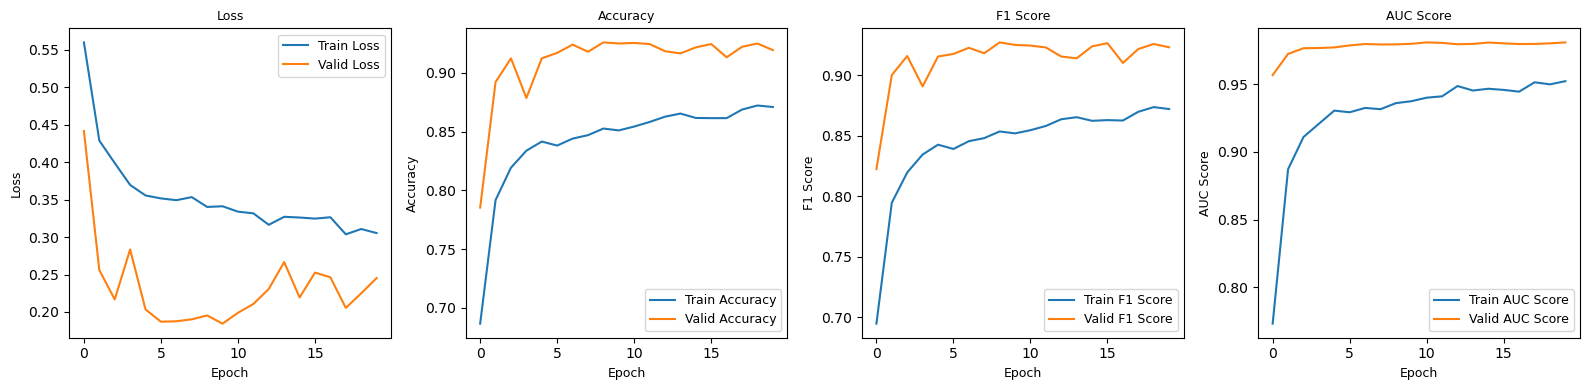

In [33]:
model = VGG16Model().to(device) # model -> GPU

# Train the model
num_epochs = 20
lr = 0.00001

trainer = ModelTrainer(model_save_directory)
best_val_file = trainer.train(model, train_loader, valid_loader, num_epochs=num_epochs, lr=lr)

In [35]:
model = VGG16Model().to(device) # model -> GPU
model.load_state_dict(torch.load(best_val_file))

test_predictions = trainer.evaluate(model, valid_loader)
df_valid["predictions"] = test_predictions
trainer.report(df_valid)
df_valid.to_csv(df_valid_filepath, index=False)

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      1049
           1       0.94      0.91      0.93      1085

    accuracy                           0.93      2134
   macro avg       0.93      0.93      0.93      2134
weighted avg       0.93      0.93      0.93      2134

Skin tone 1: Accuracy 0.9343955014058107
Skin tone 2: Accuracy 0.915651358950328


In [36]:
test_predictions = trainer.evaluate(model, test_loader)
df_test["predictions"] = test_predictions
trainer.report(df_test)
df_test.to_csv(df_test_filepath, index=False)

              precision    recall  f1-score   support

           0       0.90      0.93      0.92      1047
           1       0.93      0.90      0.92      1082

    accuracy                           0.92      2129
   macro avg       0.92      0.92      0.92      2129
weighted avg       0.92      0.92      0.92      2129

Skin tone 2: Accuracy 0.9183673469387755
Skin tone 1: Accuracy 0.9200761179828735
